# Forroset data details

Spotify data obtained on  04/11/2021

Vagalume data obtained on 10/12/2021

In [1]:
import pandas as pd
from fastparquet import ParquetFile
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
def data ():
    global ForAll_dataset
    ForAll_dataset= ParquetFile('forroset.parq')
    ForAll_dataset = ForAll_dataset.to_pandas()
data()

In [3]:
pd.set_option('display.max_columns', None)
ForAll_dataset.head(5)

,track_id,track,artist,artist_id,popularity,album,album_id,track_year,duration_ms,uri,preview_url,energy,liveness,tempo,speechiness,acousticness,instrumentalness,time_signature,danceability,key,loudness,valence,mode,beats_start,beats_duration,beats_confidence,bars_start,bars_duration,bars_confidence,tatums_start,tatums_duration,tatums_confidence,librosa_beats_start,librosa_discrepancy,tempo_bins,tempo_bins_max,genre_filt,folds,manual_filt,lyrics
0,3uCg5JVHl2E6i8gFJxUjsp,Xote Dos Milagres,Falamansa,6uTK3YD9CT3pLx2yEfVmXk,62,Deixa Entrar...,0TtLYG5fkX55XnbHQkGvaf,2000,266440,spotify:track:3uCg5JVHl2E6i8gFJxUjsp,https://p.scdn.co/mp3-preview/7e4bc5635584f198...,0.471,0.1520,79.125,0.0401,0.271,0.0,4,0.645,11,-9.192,0.767,0,"[0.66267, 1.35871, 2.07798, 2.80843, 3.52766, ...","[0.69603, 0.71927, 0.73045, 0.71923, 0.72335, ...","[0.974, 0.537, 0.424, 0.411, 0.509, 0.559, 0.5...","[0.66267, 3.52766, 6.40704, 9.27737, 12.18997,...","[2.86499, 2.87938, 2.87032, 2.9126, 2.95887, 2...","[0.699, 0.586, 0.713, 0.438, 0.77, 0.387, 0.59...","[0.66267, 1.01069, 1.35871, 1.71834, 2.07798, ...","[0.34802, 0.34802, 0.35964, 0.35964, 0.36522, ...","[0.974, 0.974, 0.537, 0.537, 0.424, 0.424, 0.4...","[0.20898, 0.97524, 1.71828, 2.50776, 3.22757, ...",0.00406,[60_81),81,1.1,12,1.0,None
1,3QQhhSRe31x9qs1NqlOuOS,Xote da Alegria,Falamansa,6uTK3YD9CT3pLx2yEfVmXk,59,Essa É Pra Vocês,03pJz5LVFVNSGNHBVREUL0,2001,253733,spotify:track:3QQhhSRe31x9qs1NqlOuOS,https://p.scdn.co/mp3-preview/5c0a908146a68d26...,0.491,0.1440,79.968,0.0476,0.554,0.0,4,0.700,11,-10.566,0.779,1,"[1.05281, 1.85256, 2.61463, 3.361, 4.11663, 4....","[0.79974, 0.76207, 0.74637, 0.75563, 0.74392, ...","[0.725, 0.861, 0.933, 0.936, 0.905, 0.744, 0.6...","[1.05281, 4.11663, 7.08905, 10.08541, 13.08507...","[3.06382, 2.97242, 2.99636, 2.99966, 2.99888, ...","[0.236, 0.286, 0.791, 0.799, 0.804, 0.655, 0.6...","[1.05281, 1.45269, 1.85256, 2.23359, 2.61463, ...","[0.39987, 0.39987, 0.38104, 0.38104, 0.37319, ...","[0.725, 0.725, 0.861, 0.861, 0.933, 0.933, 0.9...","[0.5805, 1.32354, 2.06658, 2.83283, 3.57587, 4...",0.00034,[60_81),81,1.1,13,1.0,"[Xote da Alegria, Falamansa, Se um dia alguém ..."
2,6AgLck54Q7UMolf5WASUEx,Rindo À Toa,Falamansa,6uTK3YD9CT3pLx2yEfVmXk,57,Deixa Entrar...,0TtLYG5fkX55XnbHQkGvaf,2000,219973,spotify:track:6AgLck54Q7UMolf5WASUEx,https://p.scdn.co/mp3-preview/869495e63852b840...,0.563,0.0553,79.824,0.0542,0.478,0.0,4,0.618,2,-8.889,0.836,1,"[0.90252, 1.63415, 2.37269, 3.10811, 3.85484, ...","[0.73162, 0.73854, 0.73543, 0.74673, 0.75759, ...","[0.273, 0.774, 0.634, 0.441, 0.399, 0.496, 0.3...","[1.63415, 4.61243, 7.58959, 10.52758, 13.49049...","[2.97829, 2.97716, 2.93798, 2.96291, 2.92449, ...","[0.68, 0.753, 0.192, 0.468, 0.273, 0.305, 0.48...","[0.90252, 1.26833, 1.63415, 2.00342, 2.37269, ...","[0.36581, 0.36581, 0.36927, 0.36927, 0.36771, ...","[0.273, 0.273, 0.774, 0.774, 0.634, 0.634, 0.4...","[0.53406, 1.30032, 2.04336, 2.78639, 3.55265, ...",0.00251,[60_81),81,1.1,1,1.0,"[Rindo à Toa, Falamansa, Tô numa boa\nTô aqui ..."
3,2oFutWuJCmhePvCTlrpqLc,A Vida do Viajante (feat. Gonzaguinha),Luiz Gonzaga,2ZofT7n9AlTKf7KDCoHGgD,51,Baião de Dois,4V6Ro3hUyNnfhukw59Fy26,2012,227440,spotify:track:2oFutWuJCmhePvCTlrpqLc,https://p.scdn.co/mp3-preview/bf66dfb741864aad...,0.736,0.1340,77.823,0.0337,0.466,0.0,4,0.551,5,-5.077,0.836,1,"[0.7833, 1.57731, 2.36215, 3.1433, 3.92513, 4....","[0.79401, 0.78484, 0.78115, 0.78183, 0.77798, ...","[0.978, 0.729, 0.592, 0.528, 0.778, 0.622, 0.5...","[1.57731, 4.70311, 7.80835, 10.91344, 13.99486...","[3.1258, 3.10525, 3.10509, 3.08142, 3.06582, 3...","[0.133, 0.324, 0.461, 0.321, 0.6, 0.38, 0.244,...","[0.7833, 1.18031, 1.57731, 1.96973, 2.36215, 2...","[0.397, 0.397, 0.39242, 0.39242, 0.39057, 0.39...","[0.978, 0.978, 0.729, 0.729, 0.592, 0.592, 0.5...","[1.06812, 1.83438, 2.46132, 3.15791, 3.83129, ...",0.01416,[60_81),81,1.1,8,1.0,"[A Vida do Viajante, Luiz Gonzaga, Minha vida ..."
4,2rw8Sij3CGRzp4KL720y48,Medo de Escuro,Falamansa,6uTK3YD

In [4]:
ForAll_dataset.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2977 entries, 0 to 2976
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   track_id             2977 non-null   object 
 1   track                2977 non-null   object 
 2   artist               2977 non-null   object 
 3   artist_id            2977 non-null   object 
 4   popularity           2977 non-null   int64  
 5   album                2977 non-null   object 
 6   album_id             2977 non-null   object 
 7   track_year           2977 non-null   int64  
 8   duration_ms          2977 non-null   int64  
 9   uri                  2977 non-null   object 
 10  preview_url          2977 non-null   object 
 11  energy               2977 non-null   float64
 12  liveness             2977 non-null   float64
 13  tempo                2977 non-null   float64
 14  speechiness          2977 non-null   float64
 15  acousticness         2977 non-null   f

## General Information

Words: 43494


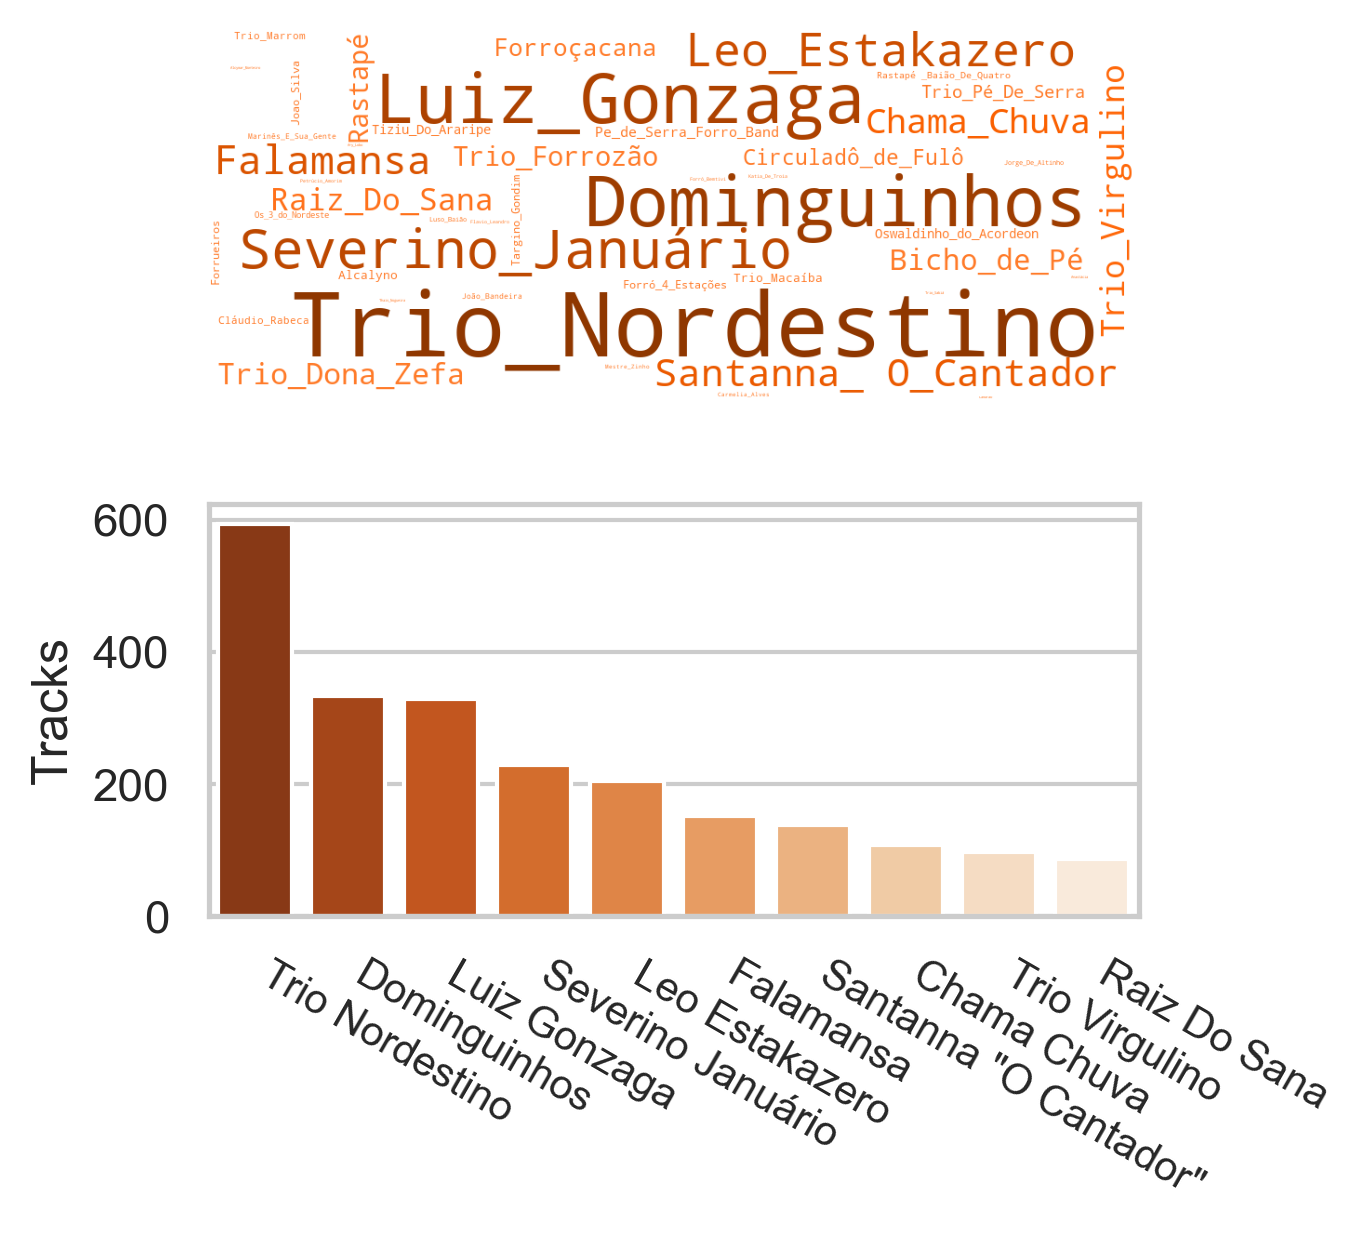

In [5]:
sns.set(style="whitegrid")
nomes=[]

for nome in ForAll_dataset['artist']:
     nomes.append(nome.replace(" ", "_"))
        

random.shuffle(nomes)
all_summary = " ".join(s for s in nomes)

print("Words: {}".format(len(all_summary)))

wordcloud = WordCloud(background_color='white' , 
                      width=1000, height=400).generate(all_summary)

l=25

def grey_color_func(word, font_size, position, orientation, random_state=0,
                    **kwargs):
    global l
    if l <=55:
        l+=3
    else:
        l+=0.01
    

    return str("hsl("+str(23)+","+str(100)+"%,"+str(l)+"%)")

count = ForAll_dataset['artist'].value_counts()

fig, axs = plt.subplots(2, figsize=(4,4),dpi=300)


axs[0].imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3))
axs[0].set_axis_off()

axs[1] = sns.barplot(x=count.head(10).index,y=count.head(10),palette= 'Oranges_r')
axs[1].set_ylabel('Tracks', fontsize=12)
axs[1].set_xticklabels(labels = count.head(10).index, fontsize=10, rotation=-30, ha= 'left')
axs[1].grid(which='minor')

# plt.savefig('artists.eps', bbox_inches="tight")

284


Text(0.5, 0, 'Albums ranking')

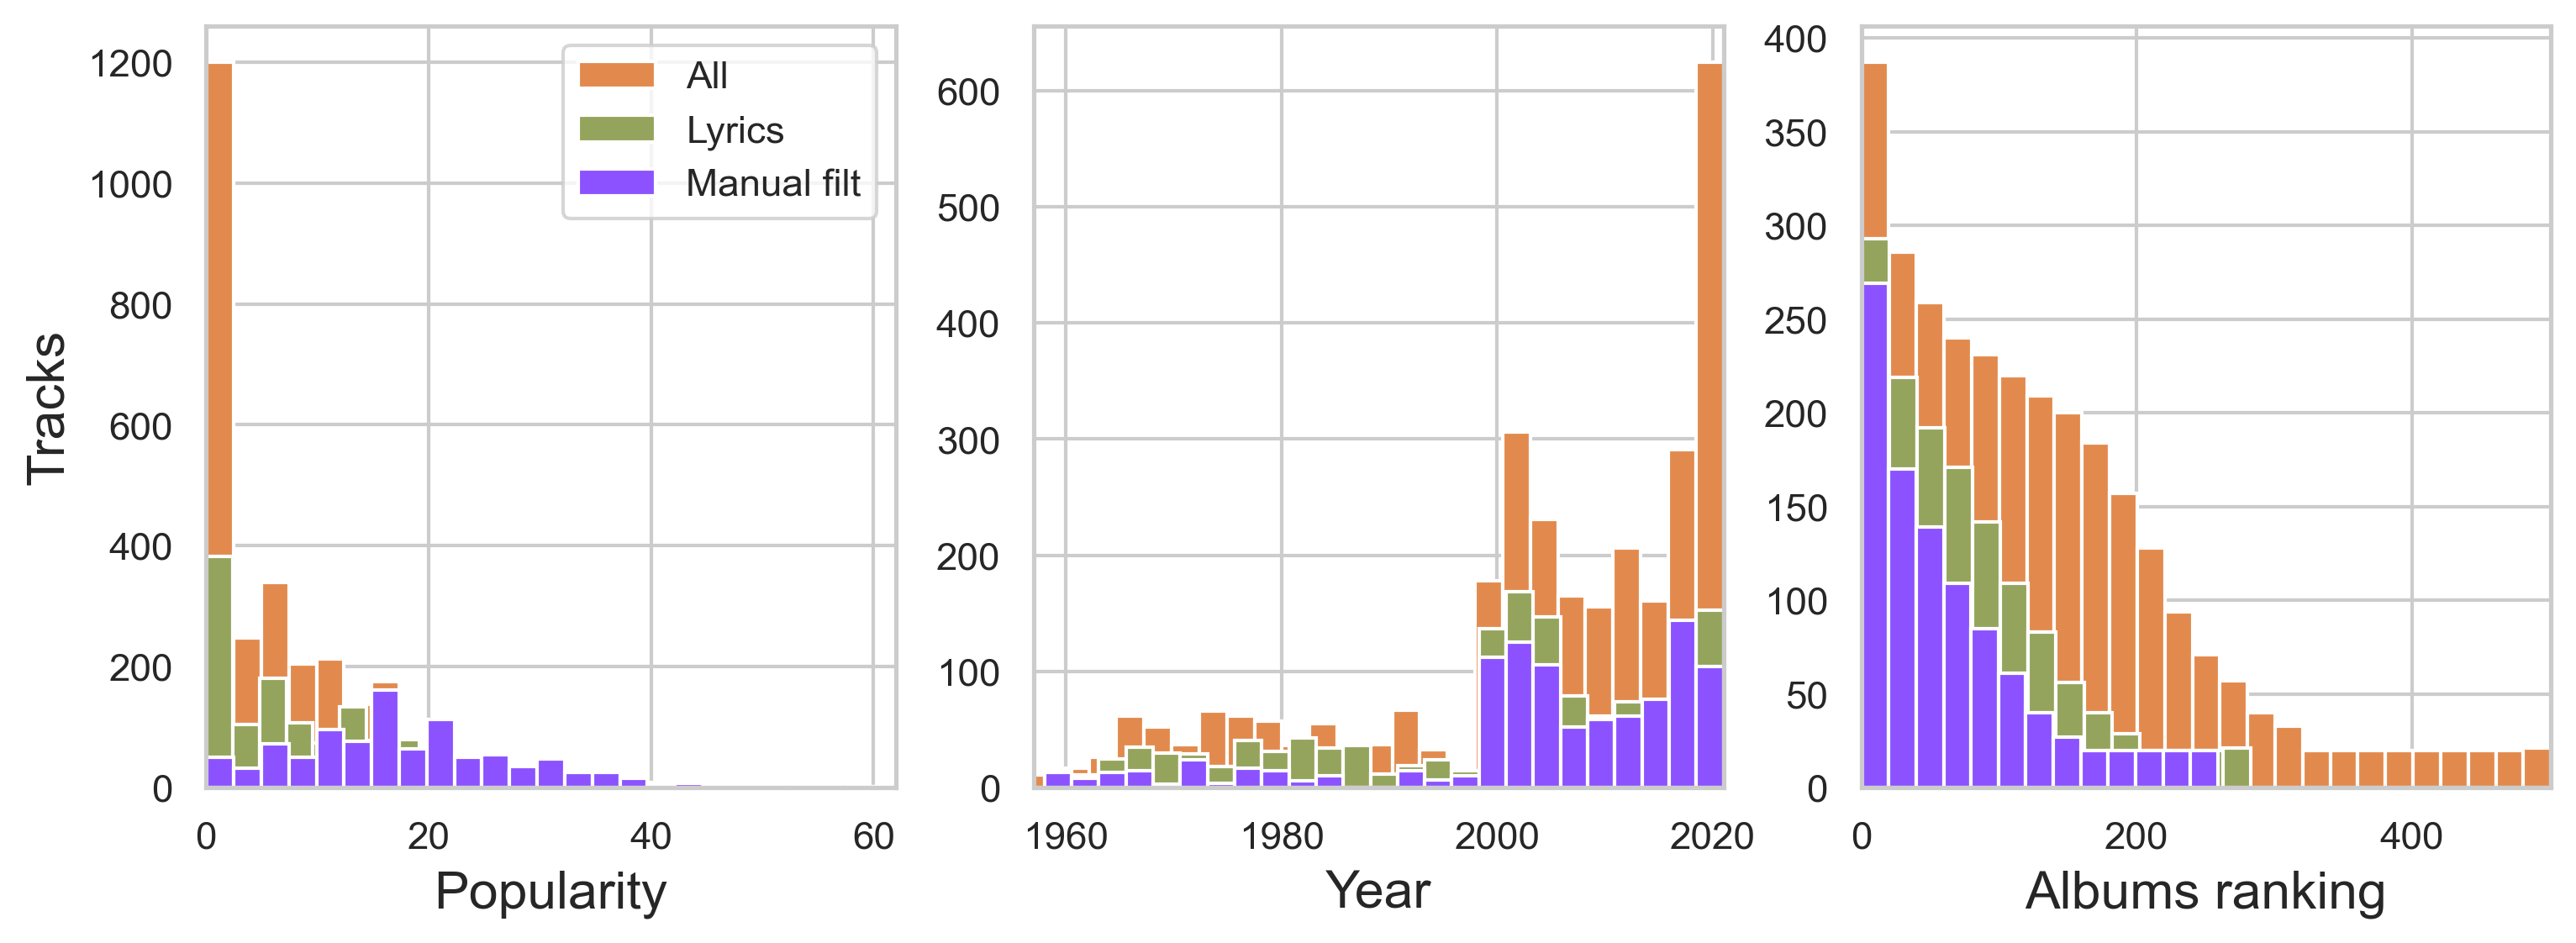

In [6]:
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="whitegrid")

data()
dados_plot = ['popularity','track_year']

x_lab = ['Popularity','Year']


fig, axs = plt.subplots(1, 3, figsize=(12,4),dpi=300)
i = 0
j = 0
k = 0
for dado in dados_plot:

    bins=25
        
    data_1000 = ForAll_dataset.copy()
    data_lirycs = ForAll_dataset.copy() 
    data_1000.dropna(subset=['manual_filt'],inplace=True)
    data_lirycs.dropna(subset=['lyrics'],inplace=True)
    axs[i].hist(ForAll_dataset[dado], bins=bins, align='mid',
                color = (226/255, 138/255, 77/255),alpha=1)#,density =True
    
    
    axs[i].hist(data_lirycs[dado], bins=bins,align='mid', 
                color = (148/255, 164/255, 92/255),alpha=1)#,density =True
    axs[i].autoscale(enable=True, axis='x', tight=True)
    axs[i].hist(data_1000[dado], bins=bins,align='mid', 
                color = (140/255, 82/255, 255/255),alpha=1)#,density =True
  

    if i==0:
        axs[i].set_ylabel('Tracks',fontsize=15)
        axs[i].legend(["All","Lyrics","Manual filt"])
    axs[i].set_xlabel(x_lab[i],fontsize=15)
   
    i+=1

count = ForAll_dataset[['album_id']].value_counts()
axs[i].hist(range(0,502), bins=int(count.shape[0]/20), weights=count.values 
            ,color = (226/255, 138/255, 77/255),alpha=1)#,density =True


data_lirycs = ForAll_dataset.copy() 
data_lirycs.dropna(subset=['lyrics'],inplace=True)
count = data_lirycs[['album_id']].value_counts()
axs[i].hist(range(0,count.shape[0]), bins=int(count.shape[0]/20), weights=count.values 
            ,color =(148/255, 164/255, 92/255),alpha=1)#,density =True
print(count.shape[0])


data_1000 = ForAll_dataset.copy()
data_1000.dropna(subset=['manual_filt'],inplace=True)
count = data_1000[['album_id']].value_counts()
axs[i].hist(range(0,count.shape[0]), bins=int(count.shape[0]/20), weights=count.values 
            ,color = (140/255, 82/255, 255/255),alpha=1)#,density =True



axs[i].autoscale(enable=True, axis='x', tight=True) 

axs[i].set_xlabel('Albums ranking',fontsize=15)

# plt.savefig('infos.eps', format='eps')
# plt.savefig('infos.eps', bbox_inches="tight")

## Audio features

Spotify features: https://developer.spotify.com/documentation/web-api/reference/#/operations/get-audio-features


In [7]:
sns.set(style="whitegrid")

data()
dados_plot = ['energy','liveness', 'tempo','valence', 
              'acousticness','instrumentalness', 'time_signature',
      'danceability','key', 'loudness',  'speechiness', 'mode']#'instrumentalness'

x_lab = ['Energy','Liveness', 'Tempo','Valence', 
              'Acousticness','Instrumentalness', 'Time signature',
      'Danceability','Key', 'Loudness',  'Speechiness', 'Mode']

fig, axs = plt.subplots(4, 3, figsize=(12,16),dpi=1000)
i = 0
j = 0
k = 0
for dado in dados_plot:
    
    if i==3:
        i=0
        j+=1


    bins = len(ForAll_dataset[dado].value_counts().index)
    if bins > 25:
        bins = 25
    bins=25
        
    data_1000 = ForAll_dataset.copy()
    data_lirycs = ForAll_dataset.copy() 
    data_1000.dropna(subset=['manual_filt'],inplace=True)
    data_lirycs.dropna(subset=['lyrics'],inplace=True)
    axs[j,i].hist(ForAll_dataset[dado], bins=bins, align='mid',color = (226/255, 138/255, 77/255),alpha=1)#,density =True
    axs[j,i].hist(data_lirycs[dado], bins=bins,align='mid', color = (148/255, 164/255, 92/255),alpha=1)#,density =True
    axs[j,i].hist(data_1000[dado], bins=bins,align='mid', color = (140/255, 82/255, 255/255),alpha=1)#,density =True
   
    axs[j,i].autoscale(enable=True, axis='x', tight=True)  

    if i==0:
        axs[j,i].set_ylabel('Tracks',fontsize=15)
        axs[j,i].legend(["All","Lyrics","Manual filt"])
    axs[j,i].set_xlabel(x_lab[k],fontsize=15)

    k+=1   
    i+=1

# plt.savefig('features.eps', format='eps')
# plt.savefig('features.eps', bbox_inches="tight")

## Audio Analysis

In [ ]:
plt.figure(figsize=(6,2),dpi=300)
k=0 #bars
l = 0 #beats
m= 0 #tatums

time = 60
len_ = time*20250

for i in range(0,len_):
        
    beat = int(ForAll_dataset['beats_start'][0][l]*20250)
    if i == beat:
        plt.plot(i/20250,1.5,'ro')
        l+=1
    
    bar = int(ForAll_dataset['bars_start'][0][k]*20250)

    if i == bar:
        plt.plot(i/20250,1.4,'k|',markersize=15, linewidth=3)
        k+=1
        
        
    tatum = int(ForAll_dataset['tatums_start'][0][m]*20250)

    if i == tatum:
        plt.plot(i/20250,1.3,'b.')
        m+=1
        
plt.legend(['Beat',"Bar",'Tatum'], ncol=3)


plt.ylim([1.2, 1.7])

plt.xlim([45, 60])
plt.axhline(y=1.4, color='k', linestyle='-',linewidth=1)
plt.xlabel("Time (s)",fontsize=14)

frame = plt.gca()
frame.axes.yaxis.set_ticklabels([])

# plt.savefig('analises.eps', format='eps')
# plt.savefig('analises.eps', bbox_inches="tight")

[Text(0, 1.2, ''), Text(0, 1.4, ''), Text(0, 1.6, ''), Text(0, 1.8, '')]

## Filters and Organization

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

fig = plt.figure(figsize=(12, 9),dpi=1000)
ax1= plt.subplot2grid((2, 2), (0, 0), colspan=2)
ax2 = plt.subplot2grid((2, 2), (1, 0), rowspan=1, colspan=1)
ax3 = plt.subplot2grid((2, 2), (1, 1), rowspan=1, colspan=1)

ax1=sns.histplot(ax = ax1,data=ForAll_dataset, x="tempo_bins", 
                 hue='folds',multiple="dodge",palette='Oranges',edgecolor="0.5",linewidth=.2)

ax1.set_ylabel('Tracks', fontsize=14)
ax1.set_xlabel('Tempo bins', fontsize=15)
ax1.autoscale(enable=True, axis='x', tight=True)

ax1.legend(list(range(19,-1,-1)), ncol=5,title= "Folds")
ax1.axhline(y=5, color= (140/255, 82/255, 255/255), linestyle='-',linewidth=1)

ax2=sns.boxplot(ax=ax2, x='folds', y='popularity',linewidth=0.5,
                data=ForAll_dataset,palette='Oranges')
ax2.set_ylabel('Popularity', fontsize=14)
ax2.set_xlabel('Folds', fontsize=14)

ax3=sns.boxplot(ax=ax3,x='folds', y='tempo', linewidth=.5, 
                data=ForAll_dataset,palette= 'Oranges')#edgecolor=".2",
ax3.set_ylabel('Tempo', fontsize=15)
ax3.set_xlabel('Folds', fontsize=15)

# plt.savefig('folds.eps', format='eps')
# plt.savefig('folds.eps', bbox_inches="tight")



## Lyrics

In [ ]:
print(ForAll_dataset['lyrics'][1][0])
print()
print(ForAll_dataset['lyrics'][1][1])
print()
print(ForAll_dataset['lyrics'][1][2])
print()
print(ForAll_dataset['lyrics'][1][3])

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import random


nomes=[]

for letra in ForAll_dataset['lyrics']:
    if letra != None:
        nomes.append(letra[2])
#     print(nome)   

random.shuffle(nomes)
all_summary = " ".join(s for s in nomes)

stopwords = set(STOPWORDS)

stops = ['de', 'e','é','o','a','que','se','pra','para','por','da','na']
for stop in stops:
    stopwords.add(stop)
    

print("Words: {}".format(len(all_summary)))

# gerar uma wordcloud
wordcloud = WordCloud(background_color='white',stopwords=stopwords  , 
                      width=1000, height=400).generate(all_summary)
fig, ax = plt.subplots( figsize=(4,4),dpi=300)

ax.imshow(wordcloud)
ax.set_axis_off()